# **Loading Data**

In [ ]:
import pandas as pd
MA = pd.read_csv("/content/p_t_MA_no_sp.csv")
CA = pd.read_csv("/content/p_t_CA_no_sp.csv")
FL = pd.read_csv("/content/p_t_FL_no_sp.csv")
TX = pd.read_csv("/content/p_t_TX_no_sp.csv")
NJ = pd.read_csv("/content/p_t_NJ_no_sp.csv")
NY = pd.read_csv("/content/p_t_NY_no_sp.csv")

In [ ]:
ds = pd.concat([MA, CA, FL, TX, NJ, NY], ignore_index=True)

In [ ]:
ds

,Unnamed: 0,links,sizes,bathrooms,bedrooms,is_pool,prices,year_built,states,types
0,2525,https://www.realtor.com/realestateandhomes-det...,"1,419sqft1,419 square feet",1bath,3bed,0,"$1,000,000",51+100,Massachusetts,single-family-home
1,776,https://www.realtor.com/realestateandhomes-det...,"1,847sqft1,847 square feet",2.5bath,3bed,0,"$1,000,000",11+20,Massachusetts,single-family-home
2,69,https://www.realtor.com/realestateandhomes-det...,"3,500sqft3,500 square feet",4.5bath,4bed,0,"$1,000,000",1+1,Massachusetts,single-family-home
3,1140,https://www.realtor.com/realestateandhomes-det...,"2,366sqft2,366 square feet",2.5bath,4bed,0,"$1,000,000",21+50,Massachusetts,single-family-home
4,1933,https://www.realtor.com/realestateandhomes-det...,"1,456sqft1,456 square feet",2bath,2bed,0,"$205,000",21+50,Massachusetts,mfd-mobile-home
...,...,...,...,...,...,...,...,...,...,...
65425,2764,https://www.realtor.com/realestateandhomes-det...,800sqft800 square feet,1bath,1bed,0,"$269,000",51+100,NY,mobile
65426,2765,https://www.realtor.com/realestateandhomes-det...,840sqft840 square feet,1bath,2bed,0,"$249,900",51+100,NY,mobile
65427,2766,https://www.realtor.com/realestateandhomes-det...,780sqft780 square feet,1bath,1bed,0,"$229,000",51+100,NY,mobile
65428,2767,https://www.realtor.com/realestateandhomes-det...,"2,400sqft2,400 square feet",1.5+bath,2bed,0,"$399,000",51+100,NY,mobile


# **Preprocessing**

In [ ]:
"""import pandas as pd


# Define a function to parse the age values
def parse_age(value):
    min_age, max_age = map(int, value.split('+'))
    return min_age, max_age

# Apply the function to create new 'Min Age' and 'Max Age' columns
ds[['Min Age', 'Max Age']] = pd.DataFrame(ds['year_built'].apply(parse_age).tolist(), columns=['Min Age', 'Max Age'])

# Drop the original 'Age' column if needed
# df = df.drop(columns=['Age'])"""


"import pandas as pd\n\n\n# Define a function to parse the age values\ndef parse_age(value):\n    min_age, max_age = map(int, value.split('+'))\n    return min_age, max_age\n\n# Apply the function to create new 'Min Age' and 'Max Age' columns\nds[['Min Age', 'Max Age']] = pd.DataFrame(ds['year_built'].apply(parse_age).tolist(), columns=['Min Age', 'Max Age'])\n\n# Drop the original 'Age' column if needed\n# df = df.drop(columns=['Age'])"

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import re

# Define a function to extract zip code from a link
def extract_zip_code(link):
    zip_code_pattern = re.compile(r'(\d{5})')
    match = zip_code_pattern.search(link)
    if match:
        return match.group(1)
    else:
        return None


# Function to compute mean
def compute_mean(value):
    numbers = value.split("+")
    num1 = int(numbers[0])
    num2 = int(numbers[1])
    return (num1 + num2) / 2


def preprocess(df):
  test = df.copy()

  # Extract Zip Code from the links
  test['Zip Code'] = test['links'].apply(extract_zip_code)

  # Compute mean for the column 'year_built'
  test['mean'] = test['year_built'].apply(compute_mean)
  test.drop_duplicates('links',inplace=True, keep='first')
  test.dropna(inplace=True)
  test.drop(['links'], axis=1 , inplace=True)
  try:
    test.drop(['Unnamed: 0'], axis=1, inplace=True)
  except:
    print("No extra column")

  # Values Unnification
  test['bedrooms'] = test['bedrooms'].replace('Studio', '1')
  test['types'] = test['types'].replace('single-family-home', 'single family home')
  test['types'] = test['types'].replace('multi-family-home', 'multi-family home')
  test['types'] = test['types'].replace('mfd-mobile-home', 'mobile')
  test['types'] = test['types'].replace('Mobile house for sale', 'mobile')

# Processing
  # Converting prices so it only contains numbers
  test['prices'] = test['prices'].str.replace('$', '', regex=True)
  # Converting bathrooms so it only contains numbers
  b = test.bathrooms.str.extract('(\d+.\d)|(\d+)')
  b.columns = ['a', 'b']
  b['a'] = b['a'].fillna(b['b'])
  b.drop(['b'], axis=1)
  test.bathrooms = b.a
  # Converting bathrooms so it only contains numbers
  test['bedrooms'] = test.bedrooms.str.extract('(\d+)')
  d = test.sizes.str.extract('(\d+,\d+)|(\d+)')
  d.columns = ['a', 'b']
  d['a'] = d['a'].fillna(d['b'])
  d.drop(['b'], axis=1)
  test.sizes = d.a
  # Removing "," so they can be converted to integers
  test['sizes'] = test['sizes'].str.replace(',', '', regex=True)
  test['prices'] = test['prices'].str.replace(',', '', regex=True)


  # test_ages= pd.get_dummies(test['year_built'], prefix='age', columns=['year_built'], dtype=float)
  # test = pd.concat([test, test_ages], axis =1)
  # test.drop('year_built', axis =1 , inplace = True)


  #Convert all the possible columns to numbers (int or float)
  try:
    test['sizes'] = pd.to_numeric(test['sizes'], errors='raise').astype(int)
    test['prices'] = pd.to_numeric(test['prices'], errors='raise').astype(int)
    test['bedrooms'] = pd.to_numeric(test['bedrooms'], errors='raise').astype(int)
    test['bathrooms'] = pd.to_numeric(test['bathrooms'], errors='raise').astype(float)
    test['Zip Code'] = pd.to_numeric(test['Zip Code'], errors='raise').astype(int)
  except ValueError as e:
    print(f"Conversion to float failed. Details: {e}")


  # Get dummies for "types" column
  types_dum = pd.get_dummies(test['types'], prefix='type', columns=['types'], dtype=float)
  test = pd.concat([test, types_dum], axis =1)
  test.drop('types', axis=1, inplace=True)


  # Cleaning the dataset
  test = test.drop(test[test.sizes > 2500].index)
  test = test.drop(test[test.sizes < 750].index)
  test.drop(test[test.bathrooms > 3].index, inplace=True)
  test.drop(test[test.bathrooms < 1.5].index, inplace=True)
  test.drop(test[test.bathrooms >= 4.5].index, inplace=True)
  test.drop(test[test.bedrooms > 4].index, inplace=True)
  test.drop(test[(test.prices < 300000) & (test.bedrooms>4) ].index, inplace=True)
  test.drop(test[(test.prices < 250000) & (test.bedrooms>3) ].index, inplace=True)
  test.drop(test[(test.prices < 320000) & (test.bathrooms>4) ].index, inplace=True)
  test.drop(test[(test.prices < 400000) & (test.bedrooms>5) ].index, inplace=True)
  test.drop(test[(test.prices < 300000) & (test.sizes>2000) ].index, inplace=True)
  test.drop(test[(test.prices < 500000) & (test.sizes>3000) ].index, inplace=True)
  test.drop(test[(test.prices > 400000) & (test.sizes<800) ].index, inplace=True)
  test.drop(test[(test.prices > 550000) & (test.sizes<1200) ].index, inplace=True)
  test.drop(test[test.prices > 600000].index, inplace=True)
  test.drop(test[test.prices < 300000].index, inplace=True)
  test.drop(['year_built', 'is_pool', 'states'], axis=1, inplace=True)


  return test


  return test

final = preprocess(ds)

In [ ]:
final[final['Zip Code'] == 75951]

,sizes,bathrooms,bedrooms,prices,Zip Code,mean,type_condo,type_mobile,type_multi-family home,type_single family home,type_townhome
41868,1500,2.0,3,399000,75951,1.0,0.0,0.0,0.0,1.0,0.0


<Axes: xlabel='bedrooms'>

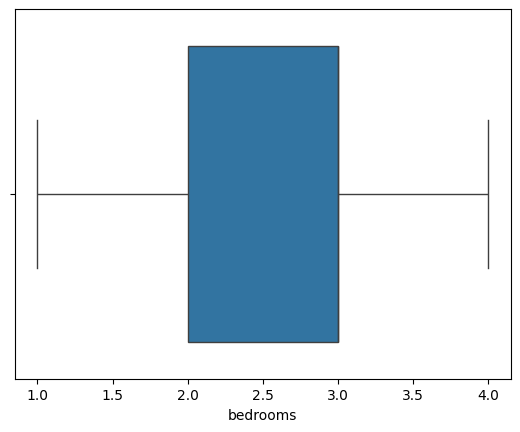

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=final['bedrooms'])

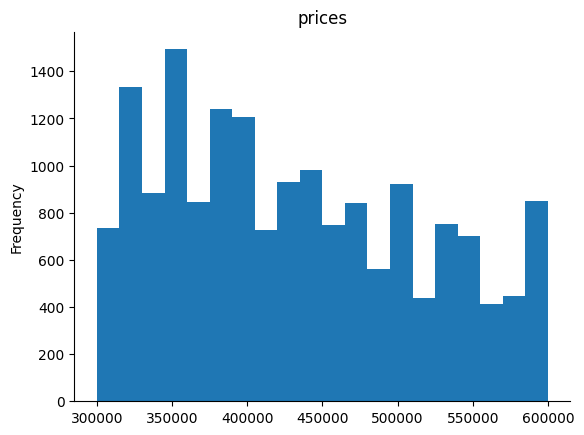

In [ ]:
from matplotlib import pyplot as plt
final['prices'].plot(kind='hist', bins=20, title='prices')
plt.gca().spines[['top', 'right',]].set_visible(False)

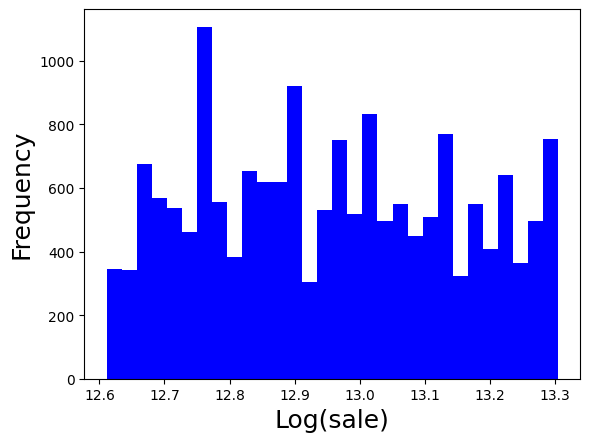

In [ ]:
np.log(final['prices']).plot.hist(bins=30, color = 'blue')
plt.xlabel('Log(sale)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize =10)
plt.yticks(fontsize = 10)
plt.show()

<Axes: >

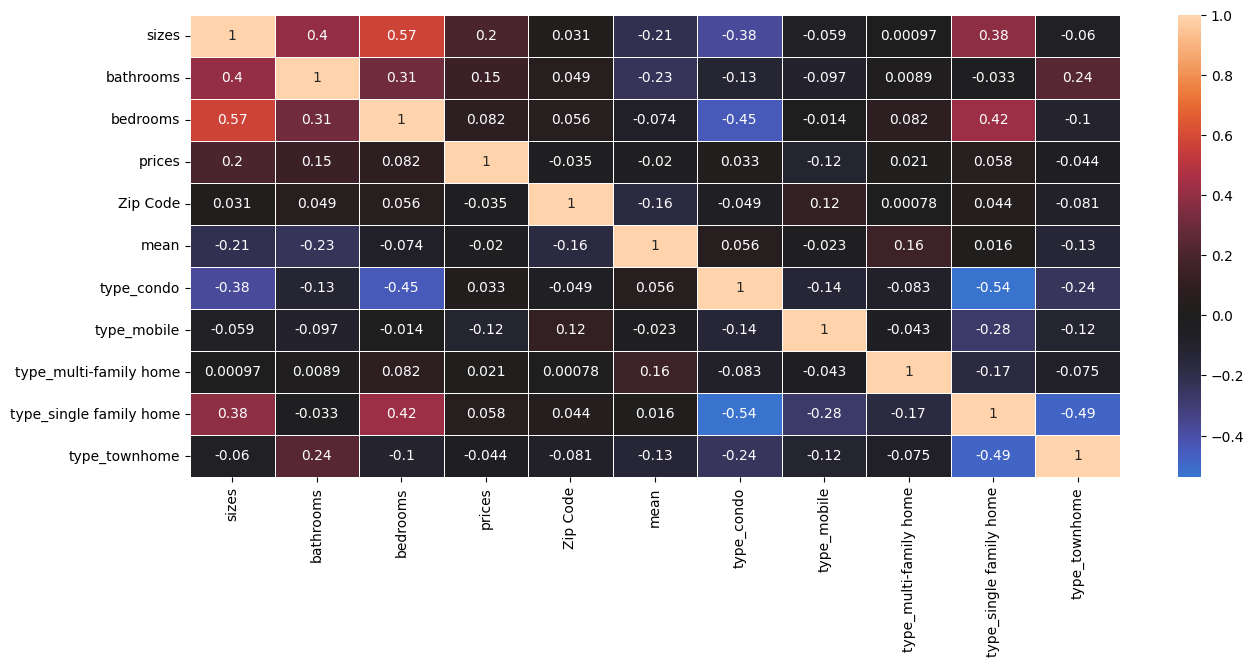

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(data=final.corr(), linewidths=0.5, center=0, annot=True, ax=ax)

In [ ]:
X = final.drop(['prices'], axis=1)
Y = final['prices']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming X_train and X_test are your training and test feature matrices
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import normalize

X_norm = normalize(X)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are your training and test feature matrices
scaler = StandardScaler()

X_standard = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2, shuffle=True)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.5, random_state = 2, shuffle = True)

# **Training**

# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
import numpy as np
from sklearn import metrics

lr_pred = lr.predict(x_test)
abs_err = np.abs(y_test - lr_pred)
proc_err = abs_err / y_test
proc_err = proc_err * 100
print("MAE:",proc_err.mean())
print("R^2:", metrics.r2_score(y_test, lr_pred))

MAE: 16.514374000590678
R^2: 0.05139786997559692


# **CatBoost**

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.7 MB/s eta 0:00:00


In [ ]:
x_train

,sizes,bathrooms,bedrooms,Zip Code,mean,type_condo,type_mobile,type_multi-family home,type_single family home,type_townhome
635,1146,2.0,2,2062,35.5,1.0,0.0,0.0,0.0,0.0
3959,1506,2.0,2,93711,35.5,1.0,0.0,0.0,0.0,0.0
57108,2054,2.5,4,14072,1.0,0.0,0.0,0.0,1.0,0.0
23976,1933,2.0,3,34997,35.5,1.0,0.0,0.0,0.0,0.0
54605,2292,2.5,3,7945,35.5,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
53605,1763,2.0,3,7728,75.5,0.0,0.0,0.0,1.0,0.0
4250,938,2.0,2,40571,35.5,1.0,0.0,0.0,0.0,0.0
41346,2164,2.5,3,10505,1.0,0.0,0.0,0.0,1.0,0.0
20699,876,1.5,1,32561,35.5,1.0,0.0,0.0,0.0,0.0


In [ ]:
#Model Evaluation
from catboost import CatBoostRegressor
fit_model = CatBoostRegressor()
fit_model.fit(x_train, y_train, cat_features=[3])
cat_pred = fit_model.predict(x_test)
lr_pred = lr.predict(x_test)
abs_err = np.abs(y_test - cat_pred)
proc_err = abs_err / y_test
proc_err = proc_err * 100
print("MAE:",proc_err.mean())
print("R^2:", metrics.r2_score(y_test, cat_pred))

Learning rate set to 0.061862
0:	learn: 83636.5308047	total: 11ms	remaining: 11s
1:	learn: 83093.0313727	total: 20.6ms	remaining: 10.3s
2:	learn: 82593.5119988	total: 28.9ms	remaining: 9.62s
3:	learn: 82164.1321730	total: 43ms	remaining: 10.7s
4:	learn: 81774.7035395	total: 49.7ms	remaining: 9.89s
5:	learn: 81400.7036158	total: 60ms	remaining: 9.94s
6:	learn: 81069.9787247	total: 81.6ms	remaining: 11.6s
7:	learn: 80763.5102881	total: 99.3ms	remaining: 12.3s
8:	learn: 80501.9118316	total: 122ms	remaining: 13.5s
9:	learn: 80246.3489151	total: 136ms	remaining: 13.5s
10:	learn: 80004.6926491	total: 148ms	remaining: 13.3s
11:	learn: 79776.7746515	total: 167ms	remaining: 13.7s
12:	learn: 79570.4016486	total: 181ms	remaining: 13.8s
13:	learn: 79378.2420194	total: 196ms	remaining: 13.8s
14:	learn: 79198.7190748	total: 211ms	remaining: 13.9s
15:	learn: 79027.5575430	total: 224ms	remaining: 13.8s
16:	learn: 78883.7749113	total: 237ms	remaining: 13.7s
17:	learn: 78747.9349668	total: 250ms	remaini

# **XGBoost**

In [ ]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 500, seed = 12)

# Fitting the model
xgb_r.fit(x_train, y_train)

# Predict the model
xgb_pred = xgb_r.predict(x_test)
abs_err = np.abs(y_test - xgb_pred)
proc_err = abs_err / y_test
proc_err = proc_err * 100
print("MAE:",proc_err.mean())
print("R^2:", metrics.r2_score(y_test, xgb_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:23:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE: 13.63893780587136
R^2: 0.1993712817251676


# **LightGBM**

In [ ]:
# Import necessary libraries for calculating mean squared error and using the LightGBM regressor.
from sklearn.metrics import mean_squared_error as mse
from lightgbm import LGBMRegressor

# Create an instance of the LightGBM Regressor with the RMSE metric.
model = LGBMRegressor(metric='mae', n_estimators=500, reg_lambda=0.2)

# Train the model using the training data.
model.fit(x_train, y_train)

# Make predictions on the training and validation data.
lgb_pred = model.predict(x_test)

abs_err = np.abs(y_test - lgb_pred)
proc_err = abs_err / y_test
proc_err = proc_err * 100
print("MAE:",proc_err.mean())
print("R^2:", metrics.r2_score(y_test, lgb_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 13629, number of used features: 10
[LightGBM] [Info] Start training from score 431424.122753
MAE: 13.143077878130548
R^2: 0.29333909786625856


# **Grid Search for Random Forest**

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 900, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 300, 500, 700, 900], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 30, 50, 70, 90, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 2 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 30, 50, 70, 90, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500, 700,
                                                         900]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

# **Random Forest**

In [ ]:
from enum import auto
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators=900, min_samples_split=5,min_samples_leaf=1, max_features='auto', max_depth = None, bootstrap=True)

reg.fit(x_train.values, y_train.values)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_features='auto', min_samples_split=5,
                      n_estimators=900)

In [ ]:
rf_pred = reg.predict(x_test.values)

In [ ]:
abs_err = np.abs(y_test - rf_pred)
proc_err = abs_err / y_test
proc_err = proc_err * 100
print("MAE:",proc_err.mean())
print("R^2:", metrics.r2_score(y_test, rf_pred))

MAE: 12.938664866253648
R^2: 0.30624803342014884


# **Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
#model3
model = Sequential()
model.add(Dense(128, input_dim = 10, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [ ]:
from keras.optimizers import Adagrad, Adam

opt = Adagrad(learning_rate=0.01, clipnorm = 1.)
adam = Adam(learning_rate = 0.1)

In [ ]:

model.compile(optimizer= 'adam',
              loss='mean_squared_error',
              metrics=['mae'])
model.summary()

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_275 (Dense)           (None, 128)               1408      
                                                                 
 dense_276 (Dense)           (None, 64)                8256      
                                                                 
 dense_277 (Dense)           (None, 32)                2080      
                                                                 
 dense_278 (Dense)           (None, 64)                2112      
                                                                 
 dense_279 (Dense)           (None, 1)                 65        
                                                                 
Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(x_train, y_train,
          batch_size=128, epochs=500,
          validation_data=(x_val, y_val))

Epoch 1/500
107/107 [==============================] - 2s 6ms/step - loss: 104624652288.0000 - mae: 291499.0938 - val_loss: 70802210816.0000 - val_mae: 234205.3281
Epoch 2/500
107/107 [==============================] - 0s 4ms/step - loss: 57529528320.0000 - mae: 209950.3906 - val_loss: 34051655680.0000 - val_mae: 157461.8281
Epoch 3/500
107/107 [==============================] - 0s 4ms/step - loss: 14341371904.0000 - mae: 95461.3438 - val_loss: 10934753280.0000 - val_mae: 84212.3906
Epoch 4/500
107/107 [==============================] - 0s 4ms/step - loss: 11051442176.0000 - mae: 84071.0078 - val_loss: 11121729536.0000 - val_mae: 84504.6953
Epoch 5/500
107/107 [==============================] - 0s 4ms/step - loss: 11058217984.0000 - mae: 84077.3516 - val_loss: 10708720640.0000 - val_mae: 83974.1250
Epoch 6/500
107/107 [==============================] - 0s 4ms/step - loss: 11063340032.0000 - mae: 84067.3359 - val_loss: 10642194432.0000 - val_mae: 83557.8672
Epoch 7/500
107/107 [========

In [ ]:
n_pred = model.predict(x_test)
nt_pred = model.predict(x_train)

In [ ]:
n_pred = n_pred.reshape(-1)

In [ ]:
n_pred.shape

(1704,)

In [ ]:
abs_err = np.abs(y_test - n_pred)
proc_err = abs_err / y_test
proc_err = proc_err * 100
print("MAE:",proc_err.mean())
print("R^2:", metrics.r2_score(y_test, n_pred))

MAE: 13.143077878130548
R^2: 0.29333909786625856


In [ ]:
model.save("NN_128_adam_0-01.h5")

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def buildModel(optimizer):
    # Initialising the ANN
    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 128, input_dim = 10 ,activation = 'relu'))

    # Adding the second hidden layer
    classifier.add(Dense(units = 64, activation = 'relu'))


    classifier.add(Dense(units = 32, activation = 'relu'))


    classifier.add(Dense(units = 64, activation = 'relu'))

    # Adding the output layer
    classifier.add(Dense(units = 1, activation = 'linear'))

    # Compiling the ANN
    classifier.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mean_absolute_error'])

    return classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

classifier = KerasRegressor(build_fn = buildModel)
#What hyperparameter we want to play with
parameters = {'batch_size': [64, 128, 256],
              'epochs': [300, 500, 700],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv = 3)
grid_search = grid_search.fit(x_train, y_train, verbose = 0)

ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

In [ ]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: " + str(best_parameters))

Best Parameters: {'batch_size': 128, 'epochs': 500, 'optimizer': 'adam'}


In [ ]:
def create_model(num_layers):
    model = Sequential()
    for _ in range(num_layers):
        model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))  # Output layer
    return model

networks = []
num_layers_list = [1,2,3]
for i in num_layers_list:
  n = create_model(i)
  networks.append(n)



In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras.optimizers import  Adam

def create_model(num_layers, n_neurons, learning_rate):
    model = Sequential()
    for i in range(1, num_layers + 1):
        if i == 1:
            model.add(Dense(units=n_neurons, activation='relu'))
        elif i == 2:
            model.add(Dense(units=int(n_neurons/2), activation='relu'))
        else:
            model.add(Dense(units=int(n_neurons/4), activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))  # Output layer

    adam = Adam(learning_rate = learning_rate)

    model.compile(loss='mean_absolute_error', optimizer=adam, metrics=['mean_absolute_error'])

    return model

param_grid = {
    'num_layers': [1, 2, 3],
    'batch_size': [128],
    'epochs': [500],
    'learning_rate': [0.01, 0.1],
    'n_neurons': [256, 128, 64],
}

classifier = KerasRegressor(build_fn=create_model, verbose=0)

grid_search = GridSearchCV(estimator=classifier,
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_error',
                           cv=2)
grid_search = grid_search.fit(x_train, y_train, verbose = 0)


<ipython-input-16-f15a0b73b7c7>:33: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasRegressor(build_fn=create_model, verbose=0)


Best Parameters: {'batch_size': 128, 'epochs': 500, 'learning_rate': 0.01, 'n_neurons': 256, 'num_layers': 1}


In [ ]:
grid_search

NameError: name 'grid_search' is not defined

In [ ]:
!pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


# **Evaluation**

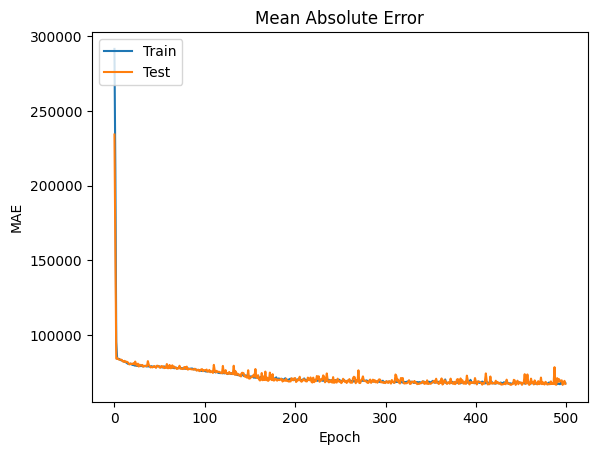

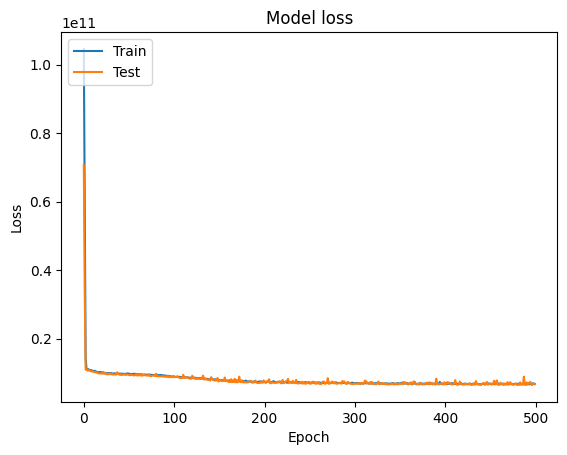

In [ ]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# # Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
abs_err = np.abs(y_test - rf_pred)
abs_err.mean()

54457.98242442046

In [ ]:
proc_err = abs_err / y_test
proc_err = proc_err * 100

In [ ]:
proc_err.mean()

12.938664866253648

In [ ]:
test_result_raw = pd.DataFrame(
    {
        'GOLD' : y_test,
        'PRED' : n_pred.round(0),
    }
)
test_result_raw.head(10)
test_result_raw.tail(10)

,GOLD,PRED
20279,385000,427684.0
61605,525000,470891.0
5659,475000,379654.0
23537,514999,433563.0
5186,439000,426802.0
18011,317000,387192.0
54236,519000,431173.0
20446,389900,393917.0
20381,389000,354582.0
53151,374900,422938.0


In [ ]:
df_result = pd.DataFrame(
    {
        'GOLD' : y_test,
        'PRED' : n_pred.round(0),
        'ERR%' : proc_err.round(2)
    }
)
df_result.head(10)


,GOLD,PRED,ERR%
18051,319000,425096.0,33.26
41841,399000,421332.0,5.60
4563,389000,387322.0,0.43
22841,479900,420297.0,12.42
22081,449000,458571.0,2.13
65149,550000,421258.0,23.41
42481,429000,381093.0,11.17
4090,349000,362790.0,3.95
40482,346500,390801.0,12.79
42323,420000,417136.0,0.68


In [ ]:
df_result.tail(10)

,GOLD,PRED,ERR%
20279,385000,427684.0,11.09
61605,525000,470891.0,10.31
5659,475000,379654.0,20.07
23537,514999,433563.0,15.81
5186,439000,426802.0,2.78
18011,317000,387192.0,22.14
54236,519000,431173.0,16.92
20446,389900,393917.0,1.03
20381,389000,354582.0,8.85
53151,374900,422938.0,12.81


In [ ]:
import tensorflow as tf
import joblib

reg = joblib.load("rf_e12_3h_6h.joblib")
model = tf.keras.models.load_model("NN_128_adam_0-01.h5")

In [ ]:
import random
my_test = random.sample(range(0, 1706), 2)
y_test.iloc[my_test]

41868    399000
65149    550000
Name: prices, dtype: int64

In [ ]:
tt = x_test.iloc[my_test]
tt

,sizes,bathrooms,bedrooms,Zip Code,mean,type_condo,type_mobile,type_multi-family home,type_single family home,type_townhome
41868,1500,2.0,3,75951,1.0,0.0,0.0,0.0,1.0,0.0
65149,1494,2.0,3,10306,75.5,0.0,0.0,1.0,0.0,0.0


In [ ]:
model.predict(tt)

1/1 [==============================] - 0s 20ms/step


array([[373567.22],
       [421258.16]], dtype=float32)

In [ ]:
reg.predict(tt)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([352907.96594561, 502173.04369569])

In [ ]:
reg_pred = reg.predict(x_test)
abs_err = np.abs(y_test - reg_pred)
abs_err.mean()

31905.083081236513

In [ ]:
proc_err = abs_err / y_test
proc_err = proc_err * 100

In [ ]:
proc_err.mean()

7.492729982634945

In [ ]:
big_error_index = df_result.loc[(df_result['ERR%']>40)].index

In [ ]:
big_error_list = list(big_error_index)

In [ ]:
df = df_result.reset_index()
df

,index,GOLD,PRED,ERR%
0,39840,320000,278063.0,13.11
1,23012,489000,443902.0,9.22
2,18344,325000,394828.0,21.49
3,63697,405000,403088.0,0.47
4,54411,550000,394687.0,28.24
...,...,...,...,...
2189,57067,379000,441576.0,16.51
2190,22956,485000,434950.0,10.32
2191,44331,560500,354849.0,36.69
2192,63143,399900,408837.0,2.23


In [ ]:
df_result

,GOLD,PRED,ERR%
6166,500000,422415.0,9.19
37878,250000,273916.0,4.63
3447,279900,269205.0,8.81
5819,485000,385797.0,20.37
37526,243900,279550.0,20.44
...,...,...,...
53069,359900,320647.0,7.63
17881,313785,358380.0,7.43
17525,299900,304853.0,4.04
18730,339000,311978.0,11.09


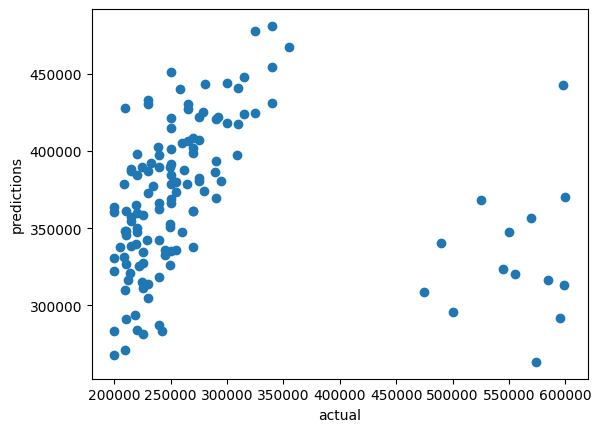

In [ ]:
dis = df_result.loc[(df_result['ERR%']>=40) ]

import matplotlib.pyplot as plt
plt.scatter(dis['GOLD'],dis['PRED'])
plt.xlabel("actual")
plt.ylabel("predictions")
plt.show()

In [ ]:
pip install keras==2.12.0